# Pontifícia Universidade Católica do Paraná
## Disciplina: Técnicas de Machine Learning
#### Conteúdo complementar da Semana 3 - Cinco Tribos

Vamos seguir a mesma ideia da semana anterior: primeiro faço os imports e aí vamos trabalhando com os exemplos. O foco deste notebook será o de demonstrar como cada uma das cinco tribos tratam um mesmo problema. Para tal, usaremos a base Iris: como ela possui menos atributos, treinamos algoritmos mais simples e temos menos atributos para colocar em um gráfico - logo, fica mais fácil de enxergar as diferenças.

Lembre-se do comando *pip* para instalar as bibliotecas que possam estar ausentes. Se não estiver rodando este notebook na máquina virtual da PUCPR precisará também baixar e instalar o <a href="https://graphviz.org/">software Graphviz</a>.

In [1]:
import pandas as pd # biblioteca para o carregamento de datasets a partir de arquivos em Excel, CSV e outros formatos
import numpy as np # biblioteca para manipulação de vetores e matrizes grandes além de outras manipulações de dados de larga escala
import matplotlib.pyplot as plt # biblioteca para mostrar gráficos (espeficamente uma parte para criar gráficos)
import seaborn as sns # outra biblioteca para mostrar gráficos (ela é especificamente boa para alguns tipos de gráficos, como mapas de calor)
import graphviz # biblioteca para mostrar a árvore de decisão gerada de forma visual

from sklearn.datasets import load_iris # importando somente a função para obtermos o dataset iris (que já vem incluso no scikit-learn)
from sklearn.model_selection import train_test_split # importando somente a função para dividirmos a base entre treinamento e teste

from sklearn import tree # biblioteca contendo algoritmos de árvore de decisão
from sklearn.tree import DecisionTreeClassifier # importando o modelo de árvore de decisão (decision tree)
from sklearn.svm import SVC # importando o modelo de SVM para classificação (SVC)
from sklearn.naive_bayes import GaussianNB # importando o modelo de Naïve Bayes
from sklearn.neural_network import MLPClassifier # importando o modelo de rede neural (multilayer perceptron)

## Dataset Iris

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris">Ele é um toy dataset que já vem incluso no scikit-learn</a>. Já trabalhamos com o Iris anteriormente - logo, espero que você já saiba o significado de cada um dos atributos e das labels. Note que na documentação existem também exemplos para sabermos o significado das classes (ou seja, descobrir o que significa a classe "0" (setosa), "1" (versicolor) ou "2" (virginica)).

No exemplo abaixo, carregamos o dataset e mostramos as últimas 5 instâncias: primeiro, todos os atributos dessas instâncias e, por fim, as suas classes. Lembre-se que não existe somente a classe 2: por uma coincidência todas as últimas 5 instâncias pertencem à mesma classe - logo, não se confunda por isso.

In [2]:
df_iris, target_iris = load_iris(as_frame=True, return_X_y=True)
class_names = load_iris()['target_names'] # carregando o nome das classes para mostrar depois
feature_names = load_iris()['feature_names'] # carregando o nome dos atributos para mostrar depois

display(df_iris.tail())
display(target_iris.tail())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


145    2
146    2
147    2
148    2
149    2
Name: target, dtype: int64

Agora, para evitar o **overfit** - isto é, para casos onde o algoritmo aprende demais para uma base de dados e não pode ser generalizado para casos novos - dividimos o dataset em dois: um de treino e outro de teste. O de treino é usado pelo algoritmo de aprendizagem supervisionada enquanto separamos a base de teste.

O algoritmo treinado não sabe nada da base de teste e a usamos para validar novos casos. Se tivermos uma boa métrica de assertividade (aprenderemos sobre isto depois) na base de **teste** pode ser um sinal de que o algoritmo também funcionará bem para novos casos futuros. <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split">O próprio scikit-learn possui um algoritmo para tratar isto, o train_test_split.</a>

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df_iris, # aqui informamos os atributos
                                                    target_iris, # aqui informamos as labels e na mesma ordem dos atributos
                                                    test_size=0.20, # informamos a porcentagem de divisão da base. Geralmente é algo entre 20% (0.20) a 35% (0.35)
                                                    random_state=0) # aqui informamos um "seed". É um valor aleatório e usado para que alguns algoritmos iniciem de forma aleatória a sua divisão.
'''
Dica: se um algoritmo possui o "random_state" informe-o para que outras pessoas também possam chegar aos
mesmos resultados que você quando forem executar no computador delas.
'''
display('Base de treinamento:')
display(X_train)
display(y_train)

display('Base de teste:')
display(X_test)
display(X_test)

'Base de treinamento:'

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


137    2
84     1
27     0
127    2
132    2
      ..
9      0
103    2
67     1
117    2
47     0
Name: target, Length: 120, dtype: int64

'Base de teste:'

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
100,6.3,3.3,6.0,2.5
40,5.0,3.5,1.3,0.3
86,6.7,3.1,4.7,1.5
76,6.8,2.8,4.8,1.4
71,6.1,2.8,4.0,1.3


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
100,6.3,3.3,6.0,2.5
40,5.0,3.5,1.3,0.3
86,6.7,3.1,4.7,1.5
76,6.8,2.8,4.8,1.4
71,6.1,2.8,4.0,1.3


### Tribo dos symbolists

Aqui, demonstraremos o uso das árvores de decisão com o <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">DecisionTreeClassifier</a>.

In [4]:
# no fit informamos a base de treinamento e as suas labels para que ele possa aprender
clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

# agora que o modelo aprendeu, mostraremos as predições para a base de teste
# (note que, para o algoritmo, a base de teste é uma base completamente nova e desconhecida)
display('Predições para a base de teste:')
clf.predict(X_test)

'Predições para a base de teste:'

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

Agora, usamos o graphviz para gerar a árvore de decisão aprendida. Dica: pegue uma das instâncias anteriores e compare com o gráfico gerado. Percorra nó-a-nó até chegar à decisão final.

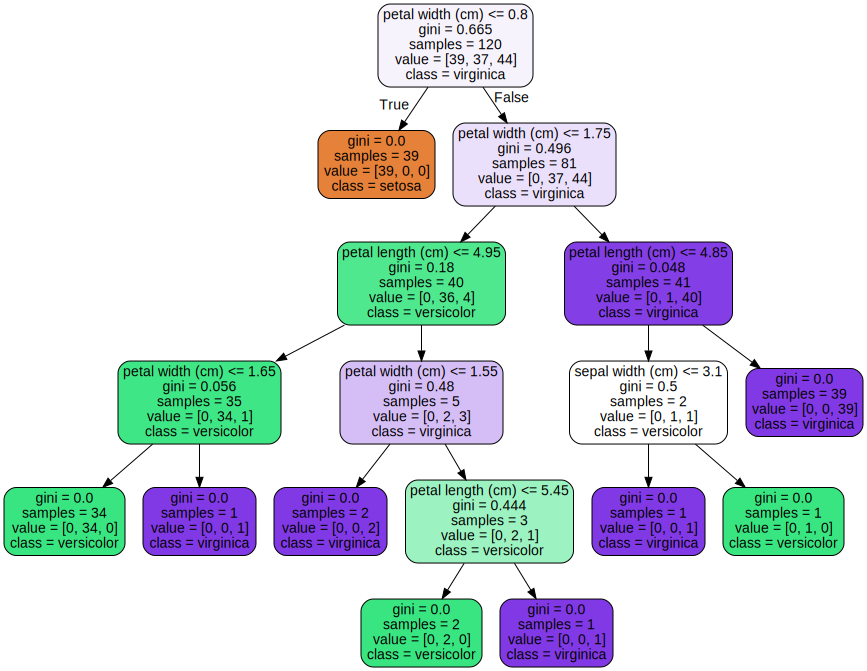

In [5]:
graph = graphviz.Source(tree.export_graphviz(clf,
                                             rounded=True,
                                             filled=True,
                                             class_names=class_names,
                                             feature_names=feature_names))
                
graph.format = "png"
graph.render("tree_iris")
display(graph)

### Tribo dos analogizers

Aqui, demonstraremos o uso do SVM (*support vector machine*, ou máquina de vetor de suporte) com o <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVC</a> (o "C" é de *classifier* - ou seja, para problemas de classificação). O SVC possui diferentes motores matemáticos e cada um deles produzirá resultados diferentes. <a href="https://scikit-learn.org/stable/modules/svm.html#svm-classification">As diferenças entre eles estão disponíveis aqui</a>.

Para fins de visualização estaremos utilizando somente os dois primeiros atributos. A ideia é que seja mais fácil para você visualizar os vetores que dividem as classes desta forma. No dia-a-dia não precisamos visualizar estes vetores e, por isso, não é necessário nos limitarmos a somente dois atributos na prática, beleza?

In [6]:
# código adaptado de https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py

# criando múltiplos exemplos para colorirmos as regiões
# note que este é também um exemplo de função: perceba que essas variáveis só existem dentro desta função,
# e repassamos outras variáveis (que podem ter outros nomes) a ela
def gera_grafico(modelo, X_treino, y_treino, arquivo):
    x_min, x_max = X_treino.values[:, 0].min() - 1, X_treino.values[:, 0].max() + 1
    y_min, y_max = X_treino.values[:, 1].min() - 1, X_treino.values[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # plotando as superfícies (cores de fundo)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.25)

    # plotando a base de treinamento
    for i in range(3):
        color = 'purple' if i == 0 else 'green' if i == 1 else 'yellow'

        # plotando a base de treinamento
        plt.scatter(X_treino[y_treino==i].values[:, 0],
                    X_treino[y_treino==i].values[:, 1],
                    c=color,
                    s=20,
                    edgecolor='k',
                    label=str(i))

    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.legend()

    plt.savefig(arquivo)

'Predições para a base de teste:'

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0])

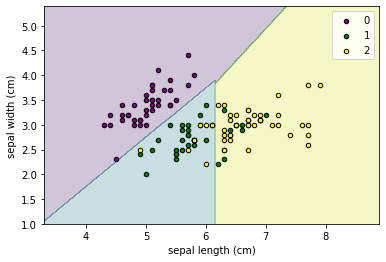

In [7]:
# da mesma forma com o DecisionTree informamos a base de treinamento e as suas labels para que ele possa aprender
# vamos usar o kernel linear para que possamos visualizar os resultados.
clf = SVC(random_state=0, probability=True, kernel='linear').fit(X_train.values[:, :2], y_train)

# agora que o modelo aprendeu, mostraremos as predições para a base de teste
# (note que, para o algoritmo, a base de teste é uma base completamente nova e desconhecida)
display('Predições para a base de teste:')
display(clf.predict(X_test.values[:, :2]))

gera_grafico(clf, X_train, y_train, 'svm_iris.png')

'Predições para a base de teste:'

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0])

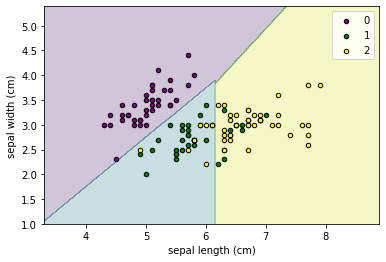

In [8]:
# da mesma forma com o DecisionTree informamos a base de treinamento e as suas labels para que ele possa aprender
# vamos usar o kernel linear para que possamos visualizar os resultados.
clf = SVC(random_state=0, probability=True, kernel='linear').fit(X_train.values[:, :2], y_train)

# agora que o modelo aprendeu, mostraremos as predições para a base de teste
# (note que, para o algoritmo, a base de teste é uma base completamente nova e desconhecida)
display('Predições para a base de teste:')
display(clf.predict(X_test.values[:, :2]))

gera_grafico(clf, X_train, y_train, 'svm_iris.png')

### Tribo dos bayesians

Aqui, demonstraremos o uso do Naïve Bayes. Basicamente os algoritmos Bayesianos utilizam técnicas da Estatística e partem da premissa de que o conhecimento vai sendo atualizado conforme temos mais informações disponíveis. Usaremos o <a href="https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html">Gaussian Naïve Bayes</a>, mas existem também outras técnicas <a href="https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes">as quais estão listadas aqui</a>.

'Predições para a base de teste:'

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0])

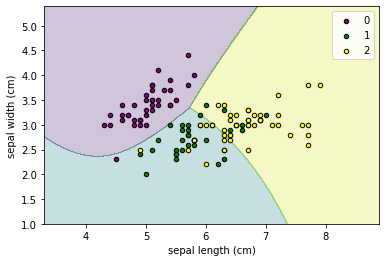

In [9]:
# da mesma forma com o DecisionTree informamos a base de treinamento e as suas labels para que ele possa aprender
# vamos usar o kernel linear para que possamos visualizar os resultados.
clf = GaussianNB().fit(X_train.values[:, :2], y_train)

# agora que o modelo aprendeu, mostraremos as predições para a base de teste
# (note que, para o algoritmo, a base de teste é uma base completamente nova e desconhecida)
display('Predições para a base de teste:')
display(clf.predict(X_test.values[:, :2]))

gera_grafico(clf, X_train, y_train, 'naivebayes_iris.png')

### Tribo dos connectionists

Aqui, demonstraremos o uso do Naïve Bayes. Basicamente os algoritmos Bayesianos utilizam técnicas da Estatística e partem da premissa de que o conhecimento vai sendo atualizado conforme temos mais informações disponíveis. Usaremos o <a href="https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html">Gaussian Naïve Bayes</a>, mas existem também outras técnicas <a href="https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes">as quais estão listadas aqui</a>.

'Predições para a base de teste:'

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0])

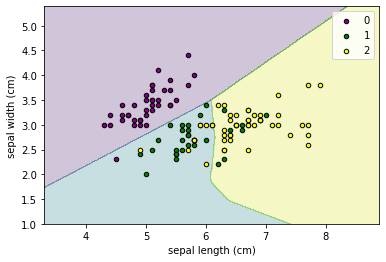

In [10]:
# da mesma forma com o DecisionTree informamos a base de treinamento e as suas labels para que ele possa aprender
# vamos usar o kernel linear para que possamos visualizar os resultados.
clf = MLPClassifier(random_state=0, max_iter=10000).fit(X_train.values[:, :2], y_train)

# agora que o modelo aprendeu, mostraremos as predições para a base de teste
# (note que, para o algoritmo, a base de teste é uma base completamente nova e desconhecida)
display('Predições para a base de teste:')
display(clf.predict(X_test.values[:, :2]))

gera_grafico(clf, X_train, y_train, 'neural_iris.png')

### Tribo dos evolucionários

O uso de algoritmos evolucionários é utilizado em maior frequência para problemas de otimização (isto é, quando precisamos maximizar ou minimizar algo, ou então criar uma rota para algum lugar). Por esta razão e pela sua complexidade não trabalharemos com um exemplo de algoritmos evolucionários para o Iris.

## Comparando diferentes técnicas
<a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py">O algoritmo abaixo é **exatamente** o mesmo código disponível na documentação do scikit-learn, aqui.</a> Ele mostra como diferentes algoritmos aprendem em cima de dados ordenados em diferentes maneiras. Observe principalmente em quais casos uma técnica aprende muito bem (e em quais casos outras técnicas praticamente não retornam nada de útil).

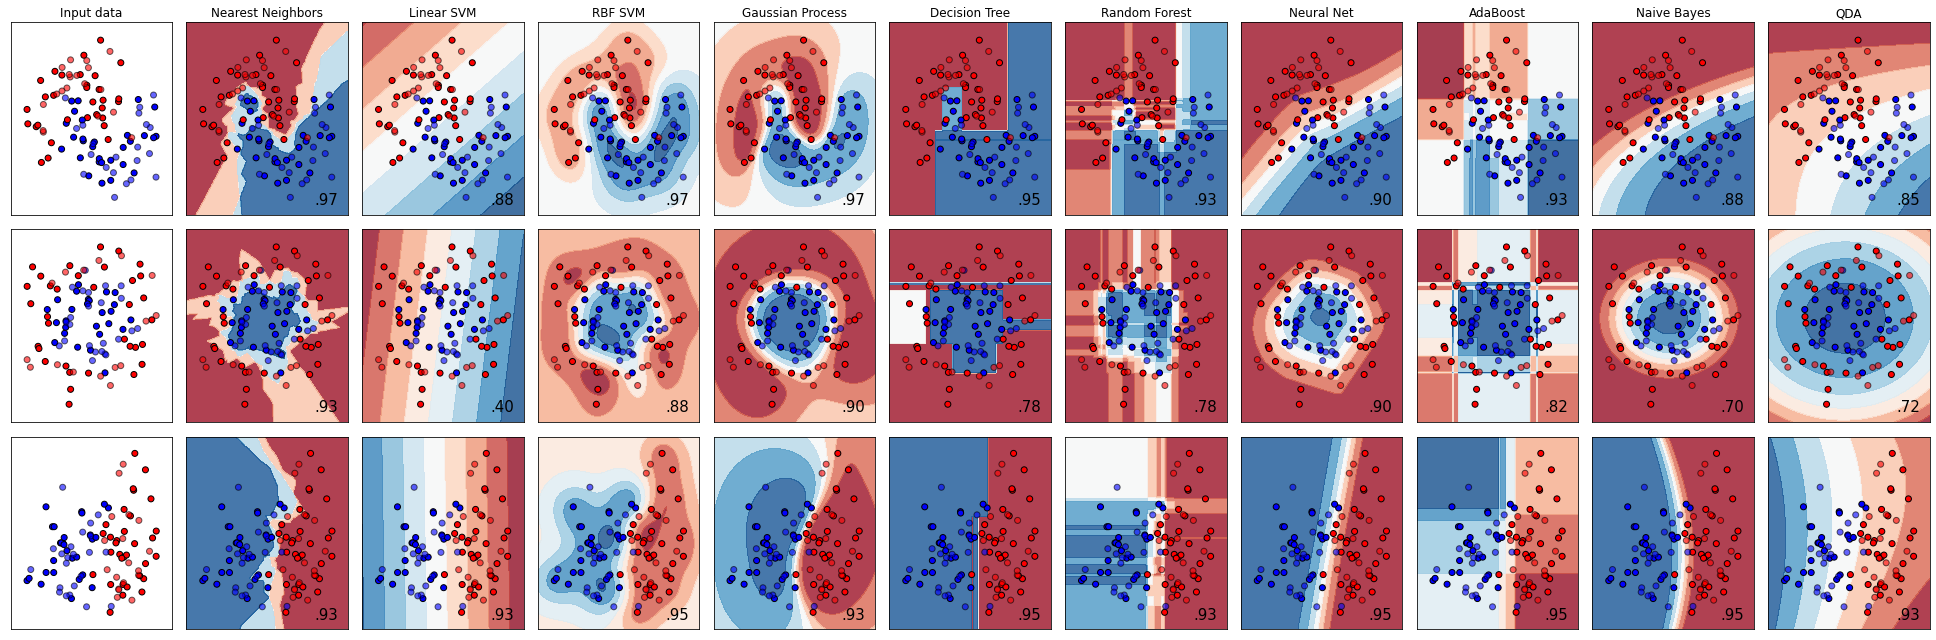

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()